In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url = './time_series_covid19_confirmed_US_small.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
# death = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
# recover = pd.read_csv(url, error_bad_lines=False)

# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'time_series_covid19_deaths_US_small.csv'
death = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
# recover = pd.read_csv(url, error_bad_lines=False)

# fix region names
# confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
# confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "Unites States")
# death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
# death['Country/Region']= death['Country/Region'].str.replace("US", "Unites States")
# recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
# recover['Country/Region']= recover['Country/Region'].str.replace("US", "Unites States")

In [2]:
# Get population
population=pd.read_csv('./population_small.csv', sep=',', encoding='latin1')
confirmed=pd.merge(confirmed, population,how='left' ,on=['Combined_Key'])
death=pd.merge(death, population,how='left' ,on=['Combined_Key'])
# recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [3]:
# merge region
confirmed['region'] = confirmed['Combined_Key'].map(str)
confirmed['region']= confirmed['region'].str.replace(" ", "_").replace(",", "")
death['region'] = death['Combined_Key'].map(str)
death['region']= death['region'].str.replace(" ", "_").replace(",", "")
# recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:5,:]

,Combined_Key,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,Population,region
0,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,55641,"American_Samoa,_US"
1,"Guam, US",29,32,37,45,51,55,56,58,69,77,82,164229,"Guam,_US"
2,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,2,6,6,55144,"Northern_Mariana_Islands,_US"
3,"Puerto Rico, US",31,39,51,64,79,100,127,174,239,286,316,2933408,"Puerto_Rico,_US"
4,"Virgin Islands, US",7,17,17,17,19,22,0,0,30,30,30,107268,"Virgin_Islands,_US"


In [4]:
def create_ts(df):
  ts=df
#   ts=ts.drop(['Combined_Key', 'Population'], axis=1)
  ts=ts.drop(['Combined_Key',], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  print(ts)
  return (ts)

In [5]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
# print(ts)
# ts_rec=create_ts(recover)

region      American_Samoa,_US  Autauga,_Alabama,_US  Guam,_US  \
3/23/20                      0                     0        29   
3/24/20                      0                     1        32   
3/25/20                      0                     4        37   
3/26/20                      0                     6        45   
3/27/20                      0                     6        51   
3/28/20                      0                     6        55   
3/29/20                      0                     6        56   
3/30/20                      0                     6        58   
3/31/20                      0                     7        69   
4/1/20                       0                     8        77   
4/2/20                       0                    10        82   
Population               55641                 55869    164229   

region      Northern_Mariana_Islands,_US  Puerto_Rico,_US  Virgin_Islands,_US  
3/23/20                                0               31    

Text(0.5, 1.0, 'Daily Total Death - Major areas')

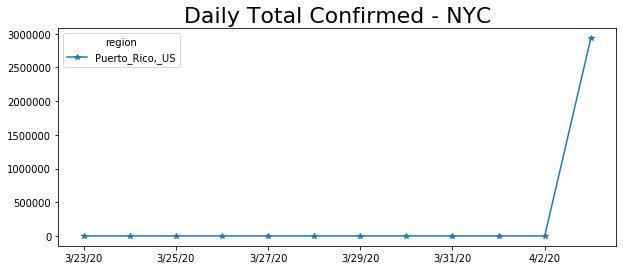

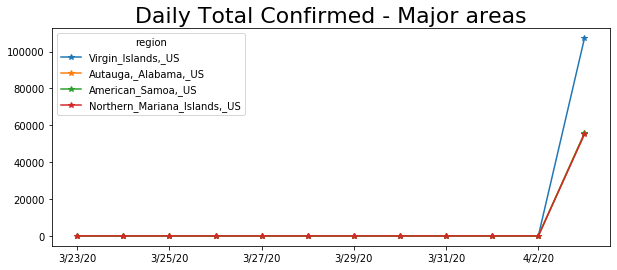

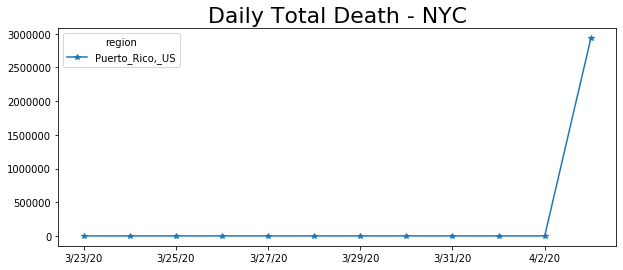

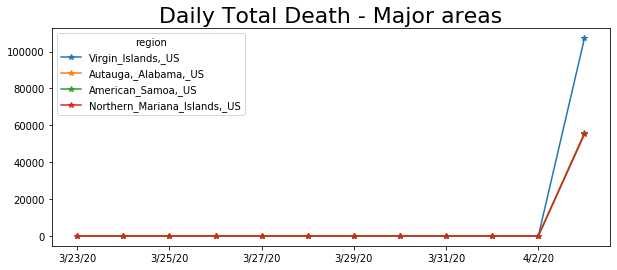

In [6]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - NYC',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - NYC',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

# p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
# p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Hubei',fontdict={'fontsize': 22})
# p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})

In [7]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv('./testing.csv')

In [8]:
import rpy2
%load_ext rpy2.ipython

C:\Users\Owner\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [9]:
%%R
install.packages('pracma')
install.packages('reshape')

In [9]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("./testing.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

In [10]:
p=%R pred_all

In [11]:
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)

temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

In [12]:
w=pd.read_csv('./w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('./w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [13]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
# t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
#     t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
    t.loc[len(t)+1] = [t.iloc[i-1,0],t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)
print(range(1,len(t)))


range(1, 78)


In [36]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3] = t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6] = ((t.iloc[i-1,2] + 10 ) / (t.iloc[i-2,2]-1 + 10))*100
    t.iloc[i,9] = t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4] = t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7] = ((t.iloc[i-1,2] + 10 )/(t.iloc[i-4,2]-1 + 10))*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5] = t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8] = ((t.iloc[i-1,2] + 10)/(t.iloc[i-8,2]-1 + 10))*100
t=t.fillna(0) 
t['date'] = pd.to_datetime(t['date'], errors ='coerce', format='%d/%m/%Y')
# t.date.astype(Object)
# print("temp date")
# print(temp['date'])
# print("t date")
# print(t['date'])
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])
train=t.merge(confirmed[['region','Population']],how='left',on='region')
train=train.rename(columns = {'Population':'population'})
train['population'] = str(train['population']).replace(r" ", '')
train['population'] = train['population'].replace(r",", '')
train['population'] = train['population'].fillna(1)
train['population'] = train['population'].astype('int')
train['infected_rate'] = train['last_day']/train['population']*10000
train=train.merge(w,how ='left',on = ['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

TypeError: cannot convert the series to <class 'int'>

In [24]:
region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,5])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

KeyError: "['kalman_prediction'] not in index"

In [51]:
# Select region
region='China_Shanghai'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

IndexError: single positional indexer is out-of-bounds